# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [26]:
!pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.8/390.3 MB 16.7 MB/s eta 0:00:24
   ---------------------------------------- 3.4/390.3 MB 9.1 MB/s eta 0:00:43
   ---------------------------------------- 4.7/390.3 MB 8.6 MB/s eta 0:00:45
    --------------------------------------- 6.6/390.3 MB 8.2 MB/s eta 0:00:47
    --------------------------------------- 7.9/390.3 MB 7.8 MB/s eta 0:00:49
    --------------------------------------- 9.4/390.3 MB 7.7 MB/s eta 0:00:50
   - -------------------------------------- 10.7/390.3 MB 7.6 MB/s eta 0:00:50
   - -------------------------------------- 12.1/390.3 MB 7.5 MB/s eta 0:00:51
   - -------------------------------------- 13.6/390.3 MB 7.4 MB/s eta 0:00:52
   - -------------------------------------- 15.2/390.3 MB 7.4 MB/s eta 0:00:51
   - -------------------------------------- 16.8/390.3 MB 7.3 MB/s eta 0:00:51
   - -------------------------------------- 18.1/390.3 MB 7.3 MB/

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("pollution_dataset.csv")

In [53]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [54]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [55]:
X = df.drop(columns=["Air Quality"])
Y = df['Air Quality']


In [56]:
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Y)


In [57]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [60]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='linear') 
])

model1.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [62]:
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

loss, accuracy = model1.evaluate(X_test, y_test)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2351 - loss: 1.4019 - val_accuracy: 0.1390 - val_loss: 0.8147
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1853 - loss: 0.7676 - val_accuracy: 0.3890 - val_loss: 0.6737
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3409 - loss: 0.6547 - val_accuracy: 0.4170 - val_loss: 0.6056
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4077 - loss: 0.5746 - val_accuracy: 0.4400 - val_loss: 0.5400
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4256 - loss: 0.5014 - val_accuracy: 0.4560 - val_loss: 0.4776
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4233 - loss: 0.4797 - val_accuracy: 0.4530 - val_loss: 0.4263
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4369 - loss: 0.4131 - val_accuracy: 0.4500 - val_loss: 0.4019
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4432 - loss: 0.3679 - val_accuracy: 0.

In [63]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)



Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2978 - loss: 0.9717 - val_accuracy: 0.5010 - val_loss: 0.5357
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4473 - loss: 0.4650 - val_accuracy: 0.4970 - val_loss: 0.3512
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4842 - loss: 0.2998 - val_accuracy: 0.5200 - val_loss: 0.3006
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4907 - loss: 0.2649 - val_accuracy: 0.5190 - val_loss: 0.2447
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4949 - loss: 0.2327 - val_accuracy: 0.5160 - val_loss: 0.2575
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4751 - loss: 0.2123 - val_accuracy: 0.5170 - val_loss: 0.1988
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4922 - loss: 0.1885 - val_accuracy: 0.5190 - val_loss: 0.1854
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4743 - loss: 0.1691 - val_accuracy: 0.

In [65]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f"Model 2 Accuracy: {accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 0.1132
Model 2 Accuracy: 0.5189999938011169


In [70]:
model3 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model3.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

loss, accuracy = model3.evaluate(X_test, y_test)
print(f"Model 3 Accuracy: {accuracy}")

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2581 - loss: 1.4239 - val_accuracy: 0.4570 - val_loss: 0.5575
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4386 - loss: 0.5996 - val_accuracy: 0.4960 - val_loss: 0.3760
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4759 - loss: 0.4405 - val_accuracy: 0.5190 - val_loss: 0.2865
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.3337 - val_accuracy: 0.5200 - val_loss: 0.2599
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5037 - loss: 0.3012 - val_accuracy: 0.5180 - val_loss: 0.2352
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4929 - loss: 0.2763 - val_accuracy: 0.5200 - val_loss: 0.2088
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4817 - loss: 0.2514 - val_accuracy: 0.5200 - val_loss: 0.2016
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4886 - loss: 0.2363 - val_accuracy: 0.

In [71]:
print("Model 1 Accuracy:", model1.evaluate(X_test, y_test)[1])
print("Model 2 Accuracy:", model2.evaluate(X_test, y_test)[1])
print("Model 3 Accuracy:", model3.evaluate(X_test, y_test)[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4966 - loss: 0.1906 
Model 1 Accuracy: 0.5019999742507935
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 0.1132
Model 2 Accuracy: 0.5189999938011169
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 0.1190
Model 3 Accuracy: 0.5189999938011169


In [73]:
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

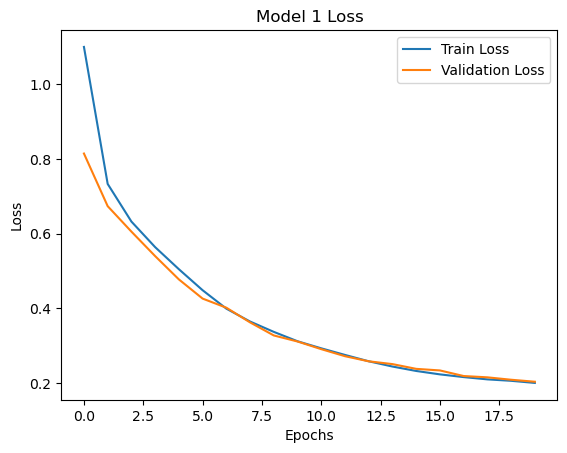

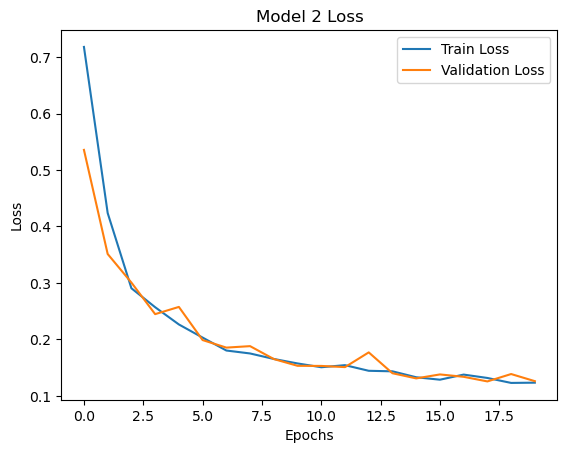

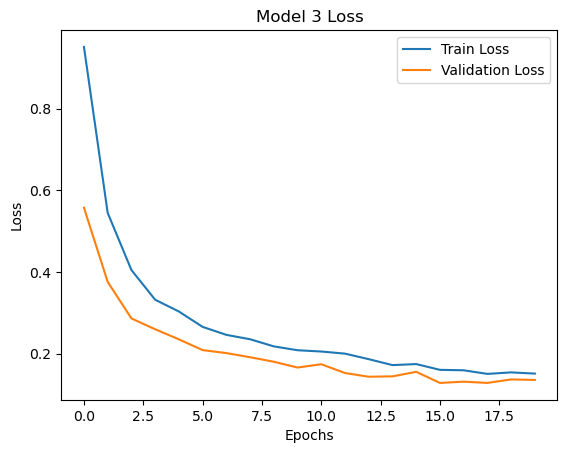

In [74]:
plot_loss(history1, "Model 1 Loss")
plot_loss(history2, "Model 2 Loss")
plot_loss(history3, "Model 3 Loss")